## Import Essential Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create Our Dataset

In [2]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(1000, 1)
y = np.sin(x)

## Plot Data

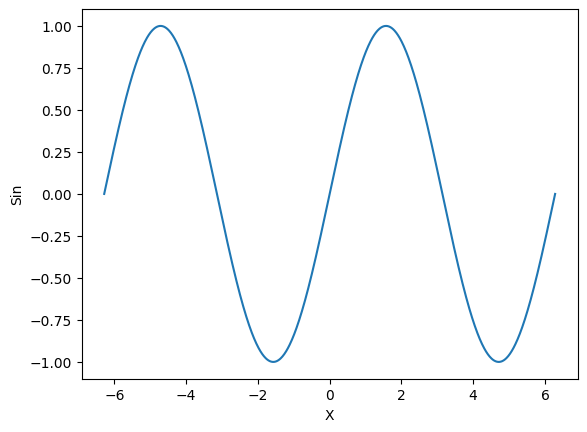

In [3]:
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Sin')
plt.axis('tight')
plt.show()

## ANN

### Activation Function

 - sigmoid $\rightarrow$ only for output layer when we have binary classification $\dfrac{1}{1 + e^x}$
 - softmax $\rightarrow$ only for output layer when we have multiclass classification $\dfrac{e^z}{∑e^i}$
 - RELU $\rightarrow$ use in hidden layers $max(0, x)$
 - Tanh $\rightarrow$ use in hidden layers $\dfrac{e^{2x} - 1}{e^{2x} + 1}$
 - Leaky RELU $\rightarrow$ use in hidden layers $max(\alpha * x, x)$

In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential(
    [
        Dense(units=64, activation='relu', input_dim=x.shape[-1] , name='input_layer'),
        Dense(units=64, activation='relu', name='hidden1'),
        Dense(units=1, activation='linear', name='output_layer')
    ],
    name = 'SIN'
)

### Summary of Model

In [5]:
model.summary()

Model: "SIN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                128       
                                                                 
 hidden1 (Dense)             (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Plot Model

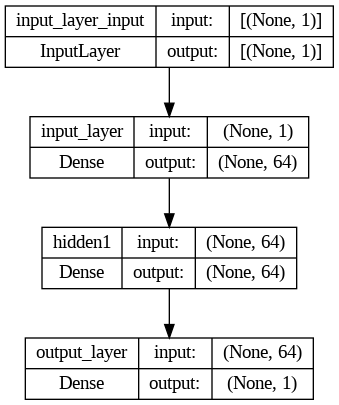

In [6]:
from keras import utils
utils.plot_model(model, show_shapes=True)

### Compile Model

Configures the model for training

In [7]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

### Fit Model

Trains the model for a fixed number of epochs (dataset iterations)

In [8]:
history = model.fit(x, y, batch_size=64, epochs=500, verbose=2)

Epoch 1/500
16/16 - 1s - loss: 0.4203 - mse: 0.4203 - 540ms/epoch - 34ms/step
Epoch 2/500
16/16 - 0s - loss: 0.3760 - mse: 0.3760 - 18ms/epoch - 1ms/step
Epoch 3/500
16/16 - 0s - loss: 0.3349 - mse: 0.3349 - 18ms/epoch - 1ms/step
Epoch 4/500
16/16 - 0s - loss: 0.2894 - mse: 0.2894 - 18ms/epoch - 1ms/step
Epoch 5/500
16/16 - 0s - loss: 0.2504 - mse: 0.2504 - 23ms/epoch - 1ms/step
Epoch 6/500
16/16 - 0s - loss: 0.2095 - mse: 0.2095 - 20ms/epoch - 1ms/step
Epoch 7/500
16/16 - 0s - loss: 0.1758 - mse: 0.1758 - 21ms/epoch - 1ms/step
Epoch 8/500
16/16 - 0s - loss: 0.1556 - mse: 0.1556 - 21ms/epoch - 1ms/step
Epoch 9/500
16/16 - 0s - loss: 0.1454 - mse: 0.1454 - 20ms/epoch - 1ms/step
Epoch 10/500
16/16 - 0s - loss: 0.1376 - mse: 0.1376 - 23ms/epoch - 1ms/step
Epoch 11/500
16/16 - 0s - loss: 0.1416 - mse: 0.1416 - 22ms/epoch - 1ms/step
Epoch 12/500
16/16 - 0s - loss: 0.1367 - mse: 0.1367 - 31ms/epoch - 2ms/step
Epoch 13/500
16/16 - 0s - loss: 0.1329 - mse: 0.1329 - 26ms/epoch - 2ms/step
Epoch 

### Predict Model

In [9]:
y_pred = model.predict(x)

32/32 [==============================] - 0s 959us/step


### Plot Prediction

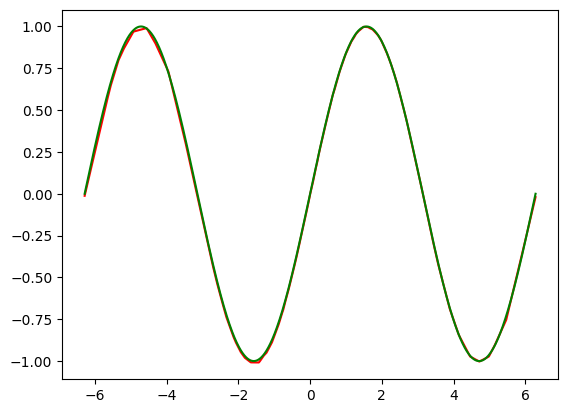

In [10]:
plt.plot(x, y_pred, color='r', label='Prediction')
plt.plot(x, y, color='g', label='Actual')
plt.show()

In [11]:
x.shape

(1000, 1)

In [12]:
sample = np.array([45*np.pi/180]).reshape(-1, 1)
model.predict(sample)

1/1 [==============================] - 0s 14ms/step


array([[0.70182174]], dtype=float32)

In [13]:
sample = np.array([30*np.pi/180]).reshape(-1, 1)
model.predict(sample)

1/1 [==============================] - 0s 24ms/step


array([[0.49445513]], dtype=float32)

In [14]:
sample = np.array([60*np.pi/180]).reshape(-1, 1)
model.predict(sample)

1/1 [==============================] - 0s 124ms/step


array([[0.86124164]], dtype=float32)

In [15]:
sample = np.array([90*np.pi/180]).reshape(-1, 1)
model.predict(sample)

1/1 [==============================] - 0s 16ms/step


array([[0.99679774]], dtype=float32)